In [4]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

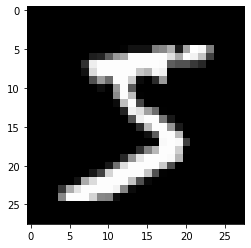

5


In [6]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [7]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [8]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1

SyntaxError: unexpected EOF while parsing (2048572704.py, line 3)

In [9]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))


Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [10]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 62s 32ms/step - loss: 0.9251 - accuracy: 0.7623 - val_loss: 0.1191 - val_accuracy: 0.9635
Epoch 2/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2906 - accuracy: 0.9136 - val_loss: 0.0750 - val_accuracy: 0.9759
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2191 - accuracy: 0.9347 - val_loss: 0.0603 - val_accuracy: 0.9793


1/1 [==============================] - 0s 260ms/step
Prediction (Softmax) from the neural network:

 [[1.0000000e+00 3.2400588e-13 4.2628545e-09 2.5371645e-12 5.2851163e-14
  6.4392892e-13 8.7538528e-09 4.8822293e-11 2.9929680e-08 1.0237780e-09]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




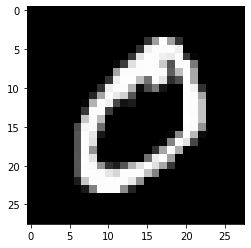



Final Output: 0


In [14]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [15]:
metrices=model.evaluate(X_test,y_test,verbose=0)
print("Metrices(test loss and Test Accuracy):")
print(metrices)

Metrices(test loss and Test Accuracy):
[0.06029662489891052, 0.9793000221252441]
